In [1]:
using OpenStreetMapX
using Downloads
using GZip
using PyCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

get_POI (generic function with 3 methods)

In [2]:
download_data("Cracow")
download_data("Brno")
download_data("Gliwice")

"The file is already downloaded"

In [3]:
df_cracow = get_POI("Cracow.osm",nothing,"Cracow.csv")
df_brno = get_POI("Brno.osm",nothing,"Brno.csv")
df_gliwice = get_POI("Gliwice.osm",nothing,"Gliwice.csv")

,elemtype,elemid,nodeid,lat,lon,key,value
,Symbol,Int64,Int64,Float64,Float64,String,String
1,node,28898012,28898012,50.2874,18.6641,public_transport,stop_position
2,node,29017182,29017182,50.2881,18.6603,public_transport,stop_position
3,node,29092672,29092672,50.2783,18.6579,public_transport,stop_position
4,node,192727330,192727330,50.191,18.8703,public_transport,stop_position
5,node,197994750,197994750,50.1825,18.6511,public_transport,stop_position
6,node,198120498,198120498,50.2876,18.654,public_transport,stop_position
7,node,198121009,198121009,50.2879,18.6545,public_transport,stop_position
8,node,198122611,198122611,50.2969,18.6588,public_transport,stop_position
9,node,198122619,198122619,50.2964,18.6571,public_transport,stop_position


In [4]:
center_cracow = LLA(50.061692315544654, 19.939496620660737)
center_brno = LLA(49.196664523003115, 16.60804112914713)
center_gliwice = LLA(50.29388096424714, 18.66566269980933)
ix_cracow = AttractivenessSpatIndex(df_cracow,get_range=a->500)
ix_brno = AttractivenessSpatIndex(df_brno,get_range=a->500)
ix_gliwice = AttractivenessSpatIndex(df_gliwice,get_range=a->500)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
15385 element(s) in 3 level(s) (1, 2, 200 node(s) per level):
 level=3 nchildren=2 mbr=((-14572.874403161311, -14399.46972170737), (9944.871016940759, 13299.92167291433)), 15385×10 DataFrame
   Row │ elemtype  elemid     nodeid       lat      lon      key               ⋯
       │ Symbol    Int64      Int64        Float64  Float64  String            ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ node       28898012     28898012  50.2874  18.6641  public_transport  ⋯
     2 │ node       29017182     29017182  50.2881  18.6603  public_transport
     3 │ node       29092672     29092

In [5]:
points_cracow = generate_sectors(200,50,center_cracow,100)
points_brno = generate_sectors(200,50,center_brno,100)
points_gliwice = generate_sectors(200,50,center_gliwice,100)

200×100 Matrix{LLA}:
 LLA(50.2939, 18.6664, 0.000195596)  …  LLA(50.2939, 18.6664, 0.000195595)
 LLA(50.2939, 18.6671, 0.000782382)     LLA(50.2939, 18.6671, 0.000782373)
 LLA(50.294, 18.6678, 0.00176036)       LLA(50.2939, 18.6678, 0.00176034)
 LLA(50.294, 18.6685, 0.00312953)       LLA(50.2939, 18.6685, 0.00312949)
 LLA(50.294, 18.6692, 0.00488989)       LLA(50.2939, 18.6692, 0.00488983)
 LLA(50.2941, 18.6699, 0.00704144)   …  LLA(50.2939, 18.6699, 0.00704136)
 LLA(50.2941, 18.6706, 0.00958418)      LLA(50.2939, 18.6706, 0.00958407)
 LLA(50.2941, 18.6713, 0.0125181)       LLA(50.2939, 18.6713, 0.012518)
 LLA(50.2941, 18.672, 0.0158432)        LLA(50.2939, 18.672, 0.0158431)
 LLA(50.2942, 18.6727, 0.0195595)       LLA(50.2939, 18.6727, 0.0195593)
 ⋮                                   ⋱  
 LLA(50.2992, 18.8001, 7.21043)         LLA(50.2938, 18.8004, 7.21035)
 LLA(50.2992, 18.8008, 7.28573)         LLA(50.2938, 18.8011, 7.28565)
 LLA(50.2993, 18.8015, 7.36142)         LLA(50.2938, 18.801

In [6]:
attr = :shopping
attr_cracow = calculate_attractiveness_of_sector(points_cracow,ix_cracow,attr)
attr_brno = calculate_attractiveness_of_sector(points_brno,ix_brno,attr)
attr_gliwice = calculate_attractiveness_of_sector(points_gliwice,ix_gliwice,attr)

200-element Vector{Float64}:
 621.5986766044937
 602.7553395658709
 568.8659829646982
 523.819775030045
 472.91673802281747
 418.81587226429787
 363.0786249193848
 309.67361283904387
 262.23148970721525
 222.58314950908007
   ⋮
   1.301080159002936
   1.2490293903610021
   1.165270381166949
   1.081760549941849
   0.9820934473734397
   0.8773618074160785
   0.7758732816018414
   0.6889588582864147
   0.6067731565941827

In [7]:
stand_cracow = min_max_scaling(attr_cracow)
stand_brno = min_max_scaling(attr_brno)
stand_gliwice = min_max_scaling(attr_gliwice)

200-element Vector{Float64}:
 1.0
 0.969656066473653
 0.915083122103508
 0.8425439993153595
 0.7605734668098608
 0.6734533844736206
 0.583698192762672
 0.49769866236006416
 0.42130133275170967
 0.35745454187086584
 ⋮
 0.0011180612799519451
 0.0010342425242597449
 0.0008993631341598054
 0.0007648850020594788
 0.0006043883804207214
 0.0004357361977177498
 0.00027230648913258496
 0.00013234585062368243
 0.0

In [8]:
x_axis = [i*50 for i in 1:200]./1000

200-element Vector{Float64}:
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  ⋮
  9.6
  9.65
  9.7
  9.75
  9.8
  9.85
  9.9
  9.95
 10.0

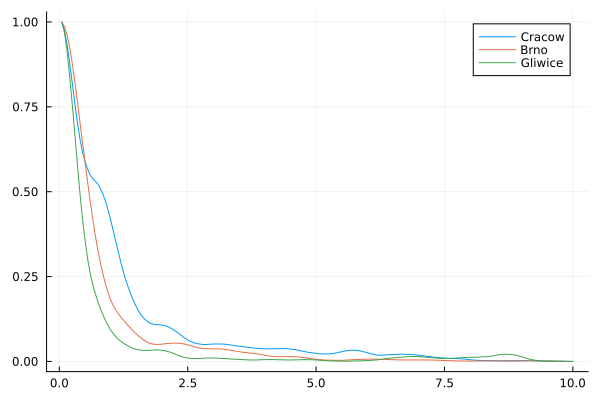

In [9]:
plot(x_axis,stand_cracow, label = "Cracow")#, marker=:circle)
plot!(x_axis,stand_brno, label = "Brno")#, marker=:circle)
plot!(x_axis,stand_gliwice, label = "Gliwice")#, marker=:circle)